## The Data

The dataset is from the US CIA organisation and contains distinct information about 227 countries.

### The main goal is to gain insights into similarity between the different countries and regions of the world.
---

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme()

In [166]:
df = pd.read_csv('CIA_COUNTRY_FACTS.csv')

## EDA

In [167]:
#countries are in ascending order
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [168]:
df.shape

(227, 20)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

Most of the columns are numerical and there are some missing values.

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


In [171]:
uniqueCountries = df['Country'].nunique()
totalCountries = df.shape[0]

print(f"There are {totalCountries - uniqueCountries} duplicated countries.")

There are 0 duplicated countries.


In [172]:
#Quick view of the columns' data
for col in df.columns:
    #print('@',col,df[col].nunique(dropna=False),df[col].unique(),'\n')
    print('@',col,df[col].nunique(dropna=False),df[col].unique()[:5],'\n')

@ Country 227 ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'] 

@ Region 11 ['ASIA (EX. NEAR EAST)         ' 'EASTERN EUROPE                     '
 'NORTHERN AFRICA                    '
 'OCEANIA                            '
 'WESTERN EUROPE                     '] 

@ Population 227 [31056997  3581655 32930091    57794    71201] 

@ Area (sq. mi.) 226 [ 647500   28748 2381740     199     468] 

@ Pop. Density (per sq. mi.) 219 [ 48.  124.6  13.8 290.4 152.1] 

@ Coastline (coast/area ratio) 151 [0.000e+00 1.260e+00 4.000e-02 5.829e+01 1.300e-01] 

@ Net migration 158 [ 23.06  -4.93  -0.39 -20.71   6.6 ] 

@ Infant mortality (per 1000 births) 221 [163.07  21.52  31.     9.27   4.05] 

@ GDP ($ per capita) 131 [  700.  4500.  6000.  8000. 19000.] 

@ Literacy (%) 141 [ 36.   86.5  70.   97.  100. ] 

@ Phones (per 1000) 215 [  3.2  71.2  78.1 259.5 497.2] 

@ Arable (%) 204 [12.13 21.09  3.22 10.    2.22] 

@ Crops (%) 163 [ 0.22  4.42  0.25 15.    0.  ] 

@ Other (%) 210 

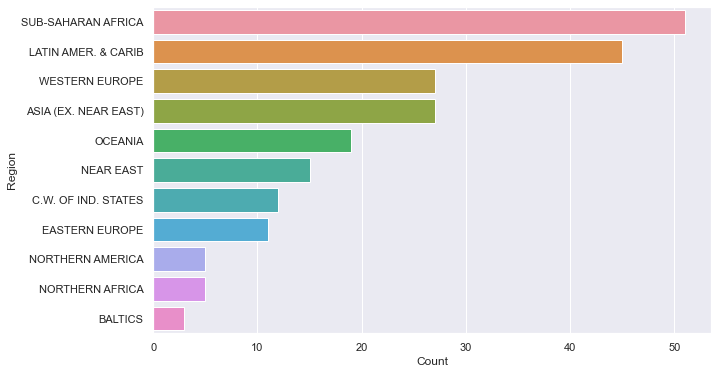

In [229]:
region = df['Region'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xlabel('Count')
plt.ylabel('Region')
sns.barplot(x=region.values,y=region.index.str.strip());

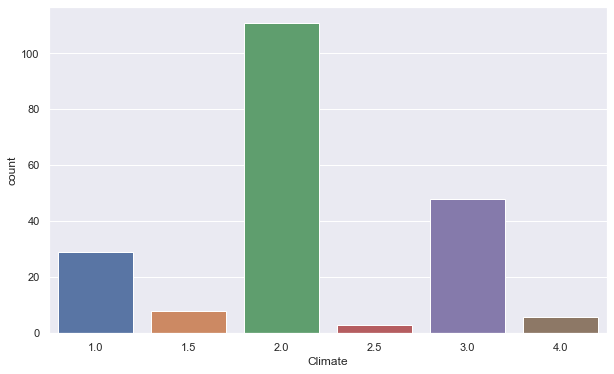

In [174]:
plt.figure(figsize=(10,6))
sns.countplot(x='Climate',data=df);

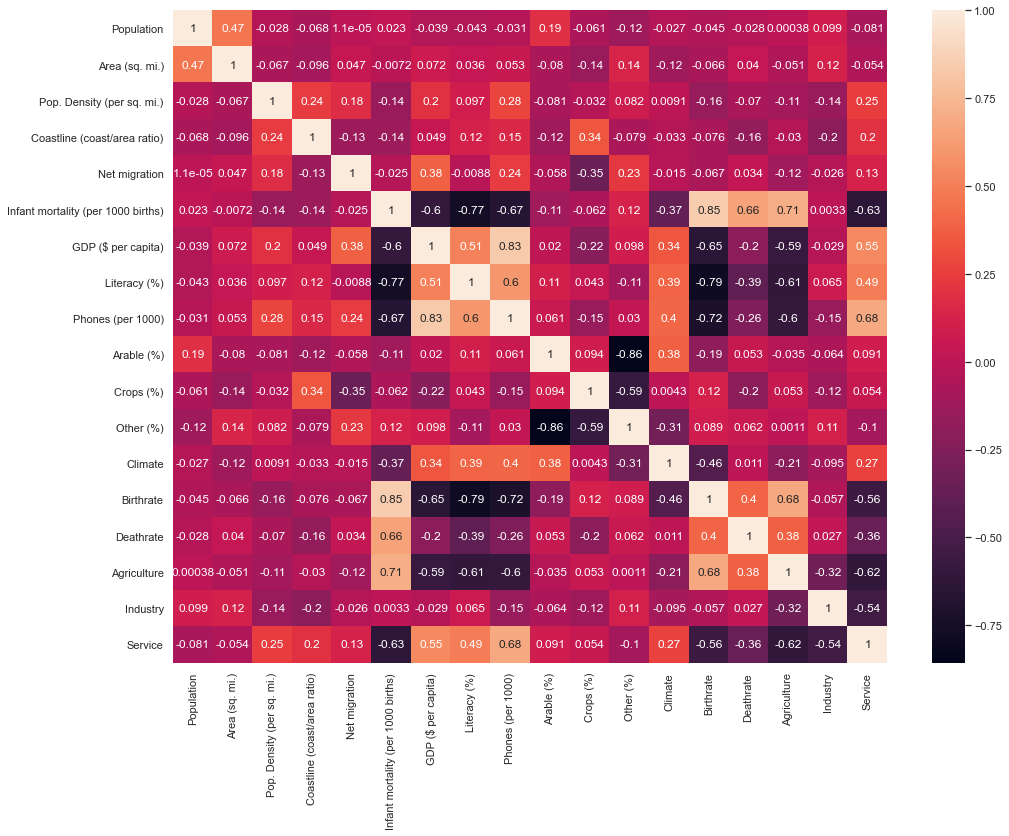

In [175]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True);

Features that are highly correlated with many other features: Birthrate, Infant mortality, GDP, Literacy, Phones.

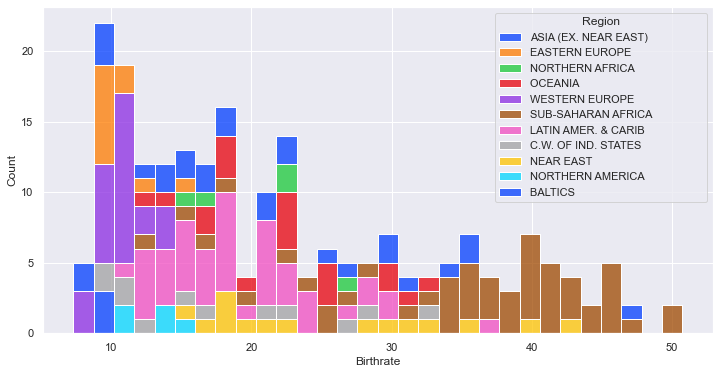

In [249]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Birthrate',hue='Region',bins=30,multiple='stack');

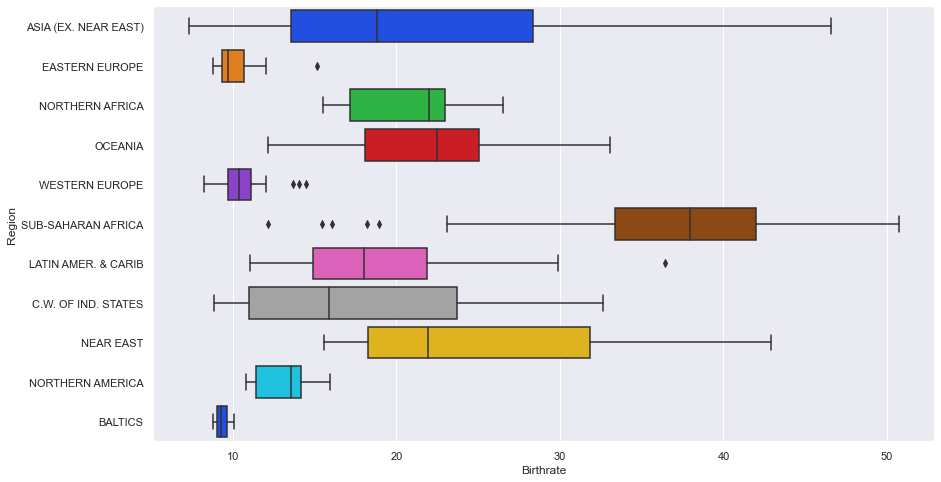

In [255]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,x='Birthrate',y=df['Region'].str.strip(),palette='bright');

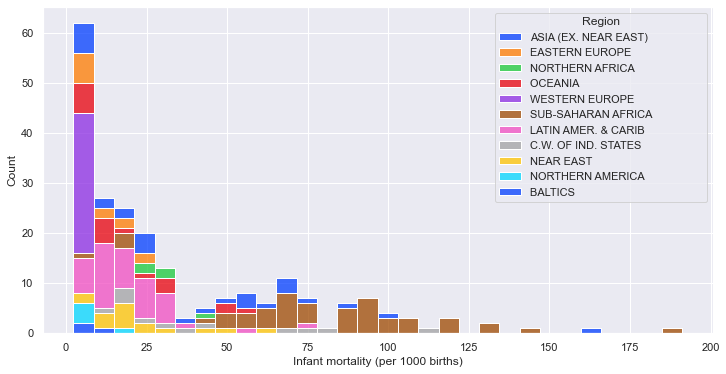

In [179]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Infant mortality (per 1000 births)',hue='Region',bins=30,multiple='stack',palette='bright');

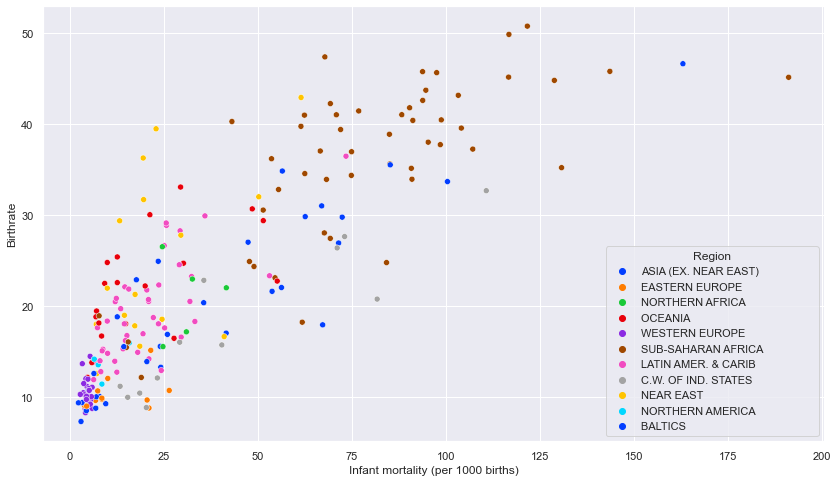

In [178]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df,x='Infant mortality (per 1000 births)',y='Birthrate',hue='Region',palette='bright');

Strong correlation between Infant mortality and Birthrate (0.85). It makes sense as generally the higher the mortality rate, the higher the birth rate to compensate for it. In addition, there are some distinct clusters for certain regions.  

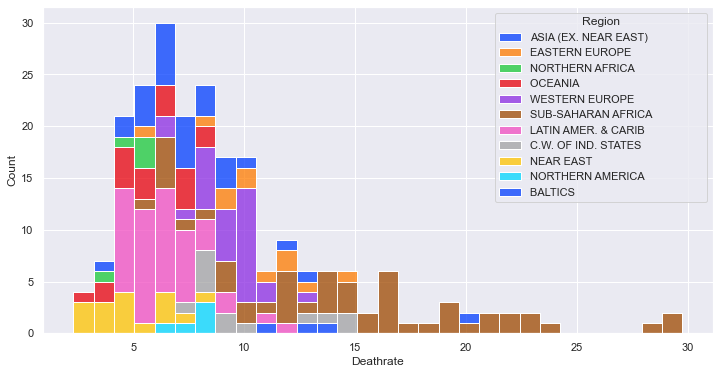

In [180]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Deathrate',hue='Region',bins=30,multiple='stack',palette='bright');

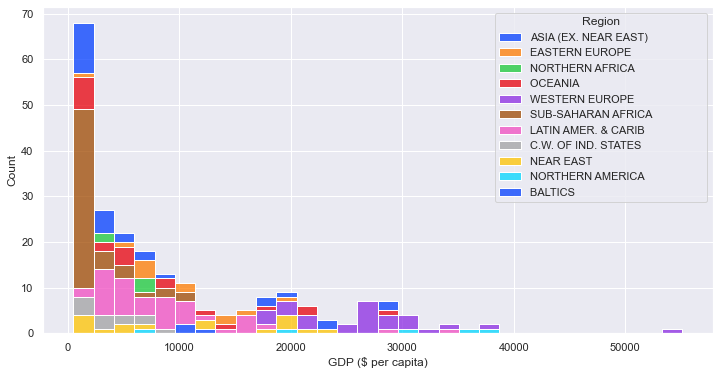

In [181]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='GDP ($ per capita)',hue='Region',bins=30,multiple='stack',palette='bright');

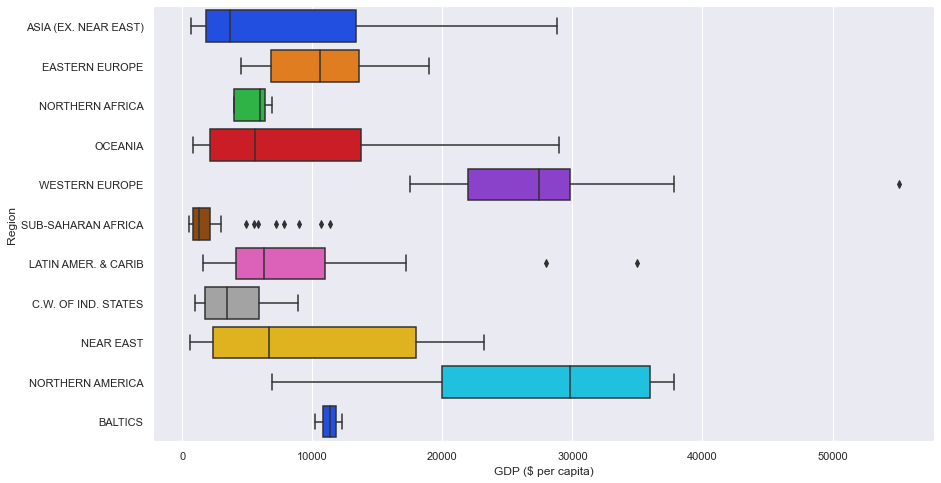

In [262]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,x='GDP ($ per capita)',y=df['Region'].str.strip(),palette='bright');

From the Infant mortality, Deathrate and GDP charts, it can be seen that richer countries generally has low total amount of deaths (e.g Europe) and the poorer countries has a high amount of deaths (e.g Sub-Saharan Africa). There also big regions such as Latin America and Asia where the values are more distributed.  

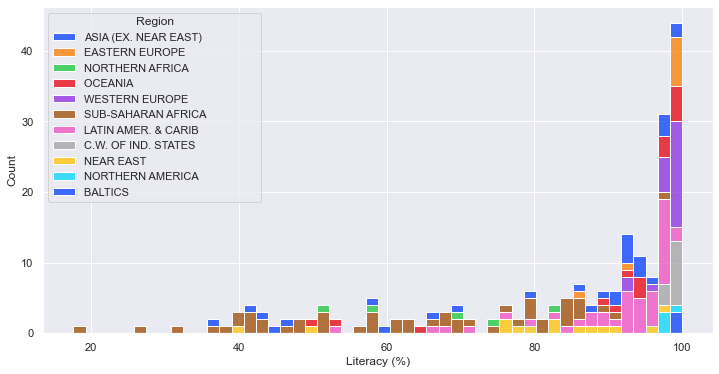

In [182]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Literacy (%)',hue='Region',bins=50,multiple='stack',palette='bright');

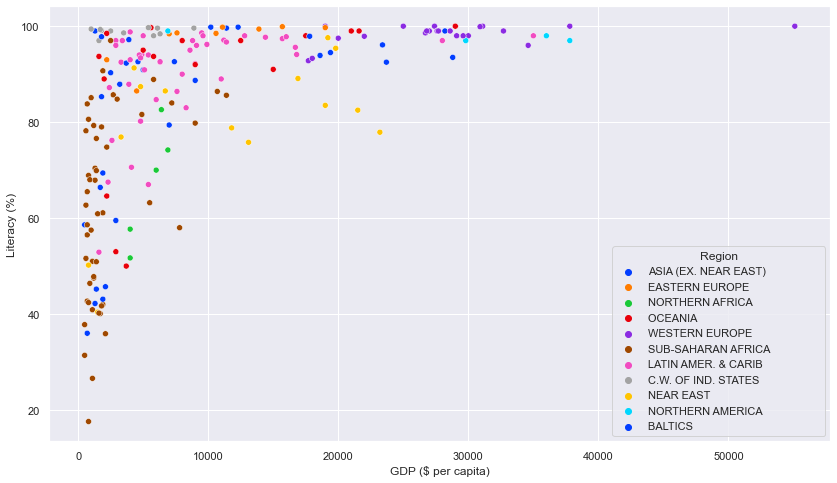

In [183]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region',palette='bright');

Interesting that GDP and Literacy is not really correlated as many countries with low GDP also has high literacy.

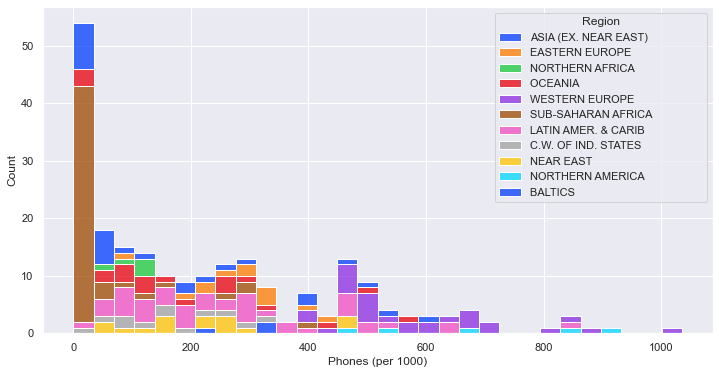

In [184]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Phones (per 1000)',hue='Region',bins=30,multiple='stack',palette='bright');

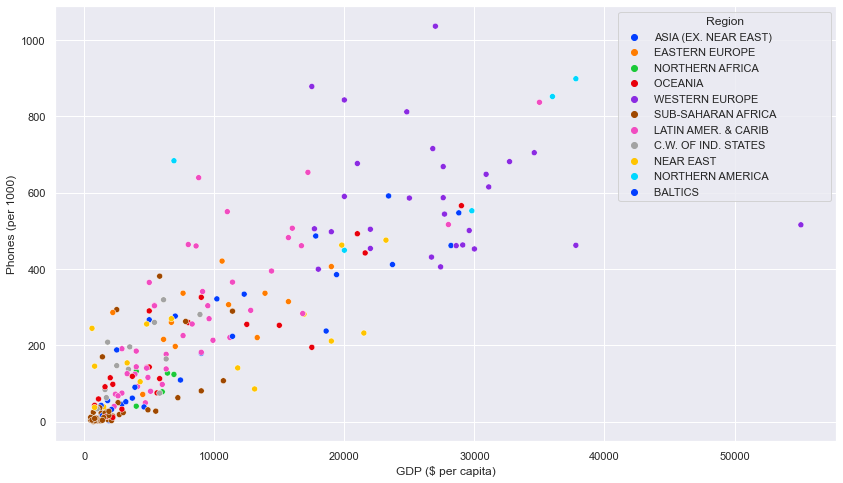

In [185]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region',palette='bright');

GDP and Phones are highly correlated. This makes sense as a higher GDP indicates a wealthier country and they can afford more goods and services such as phones. Once again, there is similar distinct clusters, which indicate that certain regions are very developed such as Western Europe while some are underdeveloped such as Sub-Saharan Africa.

## Handling missing data

In [186]:
nulls = df.isnull().sum()
nulls = nulls[nulls>0].sort_values(ascending=False)
print(nulls)

Climate                               22
Literacy (%)                          18
Industry                              16
Agriculture                           15
Service                               15
Phones (per 1000)                      4
Deathrate                              4
Net migration                          3
Infant mortality (per 1000 births)     3
Birthrate                              3
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
GDP ($ per capita)                     1
dtype: int64


For some of the column, I would fill up the missing data using information from the Region group.

https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group/19966142#19966142


In [187]:
#wanted to do mode but unable to, so used mean
df['Climate'] = df.groupby("Region")['Climate'].transform(lambda x: x.fillna(x.mean()))

In [188]:
nulls = df.isnull().sum()
nulls = nulls[nulls>0].sort_values(ascending=False)
print(nulls)

Literacy (%)                          18
Industry                              16
Agriculture                           15
Service                               15
Phones (per 1000)                      4
Deathrate                              4
Net migration                          3
Infant mortality (per 1000 births)     3
Birthrate                              3
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
GDP ($ per capita)                     1
dtype: int64


In [189]:
df['Literacy (%)'] = df.groupby("Region")['Literacy (%)'].transform(lambda x: x.fillna(x.mean()))

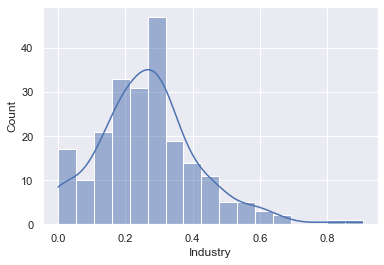

In [263]:
sns.histplot(x='Industry',data=df,kde=True);

In [191]:
df[df['Industry'].isnull()].head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.000000,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.000000,8.71,6.25,NaN,NaN,NaN
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,98.391304,877.7,0.00,0.00,100.00,3.095238,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,97.750000,448.9,0.00,0.00,100.00,1.000000,15.93,7.84,NaN,NaN,NaN
83,Guam,OCEANIA,171019,541,316.1,23.20,0.00,6.94,21000.0,99.000000,492.0,9.09,16.36,74.55,2.000000,18.79,4.48,NaN,NaN,NaN


Many countries has misisng values for Agriculture, Industry and Service. In addition, most of them are small islands. 

In [192]:
df[df['Industry'].isnull()] = df[df['Industry'].isnull()].fillna(0)

In [193]:
nulls = df.isnull().sum()
nulls = nulls[nulls>0].sort_values(ascending=False)
print(nulls)

Phones (per 1000)                     2
Deathrate                             2
Net migration                         1
Infant mortality (per 1000 births)    1
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Birthrate                             1
dtype: int64


In [194]:
#For the rest, I will just drop it
df = df.dropna()

## Feature Engineering

In [195]:
df['Birth to infant mortality rate'] = df['Birthrate']/df['Infant mortality (per 1000 births)']

<ipython-input-195-91ca3c25e647>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



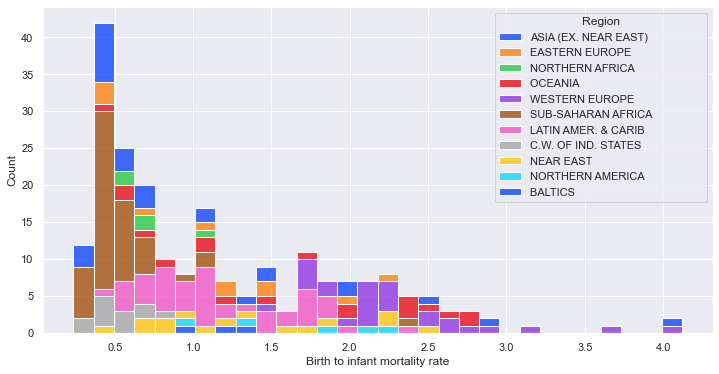

In [196]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Birth to infant mortality rate',hue='Region',bins=30,multiple='stack',palette='bright');

In [197]:
df['Birth to Death ratio'] = df['Birthrate']/df['Deathrate']

<ipython-input-197-3874a3f3cbbc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



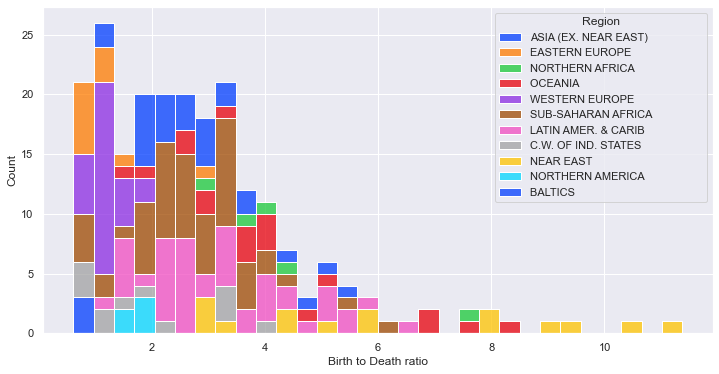

In [198]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Birth to Death ratio',hue='Region',bins=30,multiple='stack',palette='bright');

In [199]:
df['Birth to infant mortality rate'].corr(df['Birth to Death ratio'])

-0.037092379376969895

Since there is not much correlation between both, I will stick to Birth to infant mortality rate.

In [200]:
df = df.drop('Birth to Death ratio',axis=1)

In [201]:
#unsure why have nan values here, perhaps is caused by division by 0
nulls = df.isnull().sum()
nulls = nulls[nulls>0].sort_values(ascending=False)
print(nulls)

Birth to infant mortality rate    2
dtype: int64


In [202]:
df[df['Birth to infant mortality rate'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Birth to infant mortality rate
221,Wallis and Futuna,OCEANIA,16025,274,58.5,47.08,0.0,0.0,3700.0,50.00,...,5.00,25.0,70.00,2.0,0.0,0.0,0.0,0.0,0.0,NaN
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.0,0.0,0.0,67.24,...,0.02,0.0,99.98,1.0,0.0,0.0,0.0,0.0,0.4,NaN


In [203]:
df = df.dropna()

## Data preprocessing

In [204]:
X = df.drop("Country",axis=1)

In [205]:
X = pd.get_dummies(X)

In [206]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Modeling

In [209]:
from sklearn.cluster import KMeans

In [210]:
ssd = []

for k in range(2,31):
    
    model = KMeans(n_clusters=k,random_state=1)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

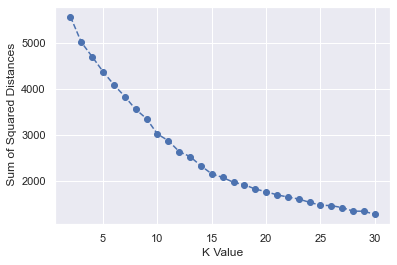

In [211]:
plt.plot(range(2,31),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

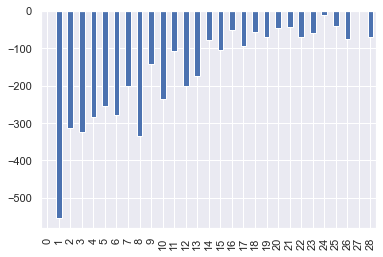

In [212]:
pd.Series(ssd).diff().plot(kind='bar');

For now I will choose K=3 for simplicity.

In [213]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [214]:
unique, counts = np.unique(model.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0  38]
 [  1 122]
 [  2  60]]


In [215]:
X['K=3 Clusters'] = model.labels_

X.corr()['K=3 Clusters'].sort_values()

Phones (per 1000)                            -0.805177
GDP ($ per capita)                           -0.787381
Birth to infant mortality rate               -0.742592
Literacy (%)                                 -0.708807
Region_WESTERN EUROPE                        -0.623483
Climate                                      -0.450668
Service                                      -0.375065
Pop. Density (per sq. mi.)                   -0.244919
Net migration                                -0.191964
Region_NORTHERN AMERICA                      -0.161768
Coastline (coast/area ratio)                 -0.144808
Region_LATIN AMER. & CARIB                   -0.076845
Region_OCEANIA                               -0.071113
Area (sq. mi.)                               -0.049940
Arable (%)                                   -0.047282
Region_EASTERN EUROPE                        -0.034766
Region_NORTHERN AFRICA                       -0.023110
Region_BALTICS                               -0.017818
Other (%) 

## Geographical Model Interpretation

Using plotly to visualise it on a map.
https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

In [216]:
iso_codes = pd.read_csv('country_iso_codes.csv')

In [217]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [218]:
#make it a dictionary for conversion
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [219]:
df['Iso Code'] = df['Country'].map(iso_mapping)

In [220]:
df['Cluster'] = model.labels_

In [221]:
fig = px.choropleth(df, locations="Iso Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Plasma'
                    )
fig.show()

For K=3, the clusters would indicate: Established first world countries(pink), Developing countries(blue), Third world countries(yellow).

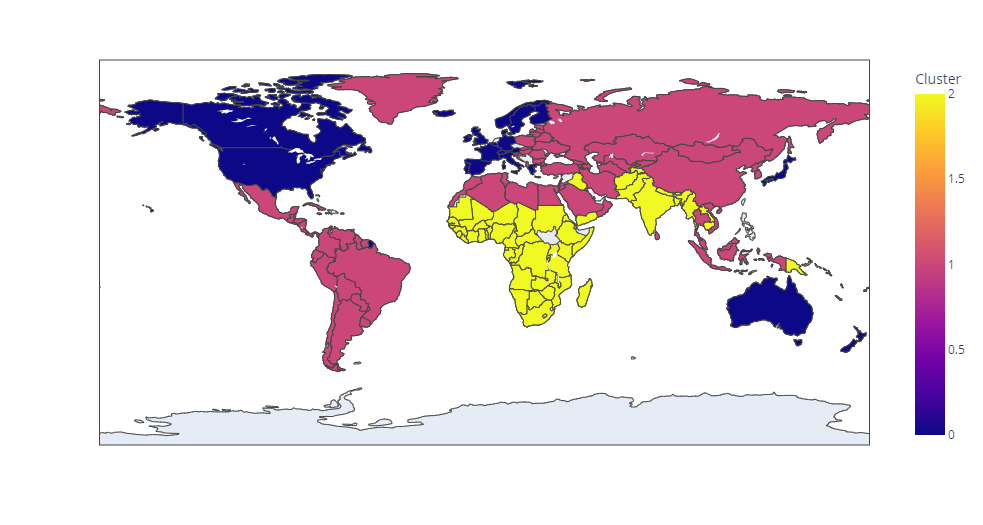
The png plot incase it doesnt show up.

In [225]:
#Code to play around the clusters
model = KMeans(n_clusters=10)
model.fit(scaled_X)

df['Cluster'] = model.labels_

fig = px.choropleth(df, locations="Iso Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Plasma'
                    )
fig.show()